In [1]:
import os
import numpy as np
import torch

from data_loader.holi_raw_loader import MultiRawDataset

/home/jhseon/anaconda3/envs/mnm/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:14: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.1)
  from scipy.sparse import csr_matrix, issparse


In [2]:
dataset = MultiRawDataset(
    root="/data/test_holoassist",
    label_root="/data/holoassist",
    subset="train",
    max_samples=100,
    transform=None,
    target_transform=None,
)

In [3]:
sample_dict = dataset[0]

In [4]:
for key in sample_dict.keys():
    print(key, sample_dict[key].shape)


rgb (100, 3, 504, 896)
head (100, 4, 4)
hands-left (100, 26, 3)
hands-right (100, 26, 3)
depth (100, 256, 454)
disparity (100, 256, 454)
hands-left-traj (100, 3, 504, 896)
hands-right-traj (100, 3, 504, 896)
raymap (100, 6, 504, 896)


In [5]:
np.sum(sample_dict['hands-right-traj'])

-15950.328

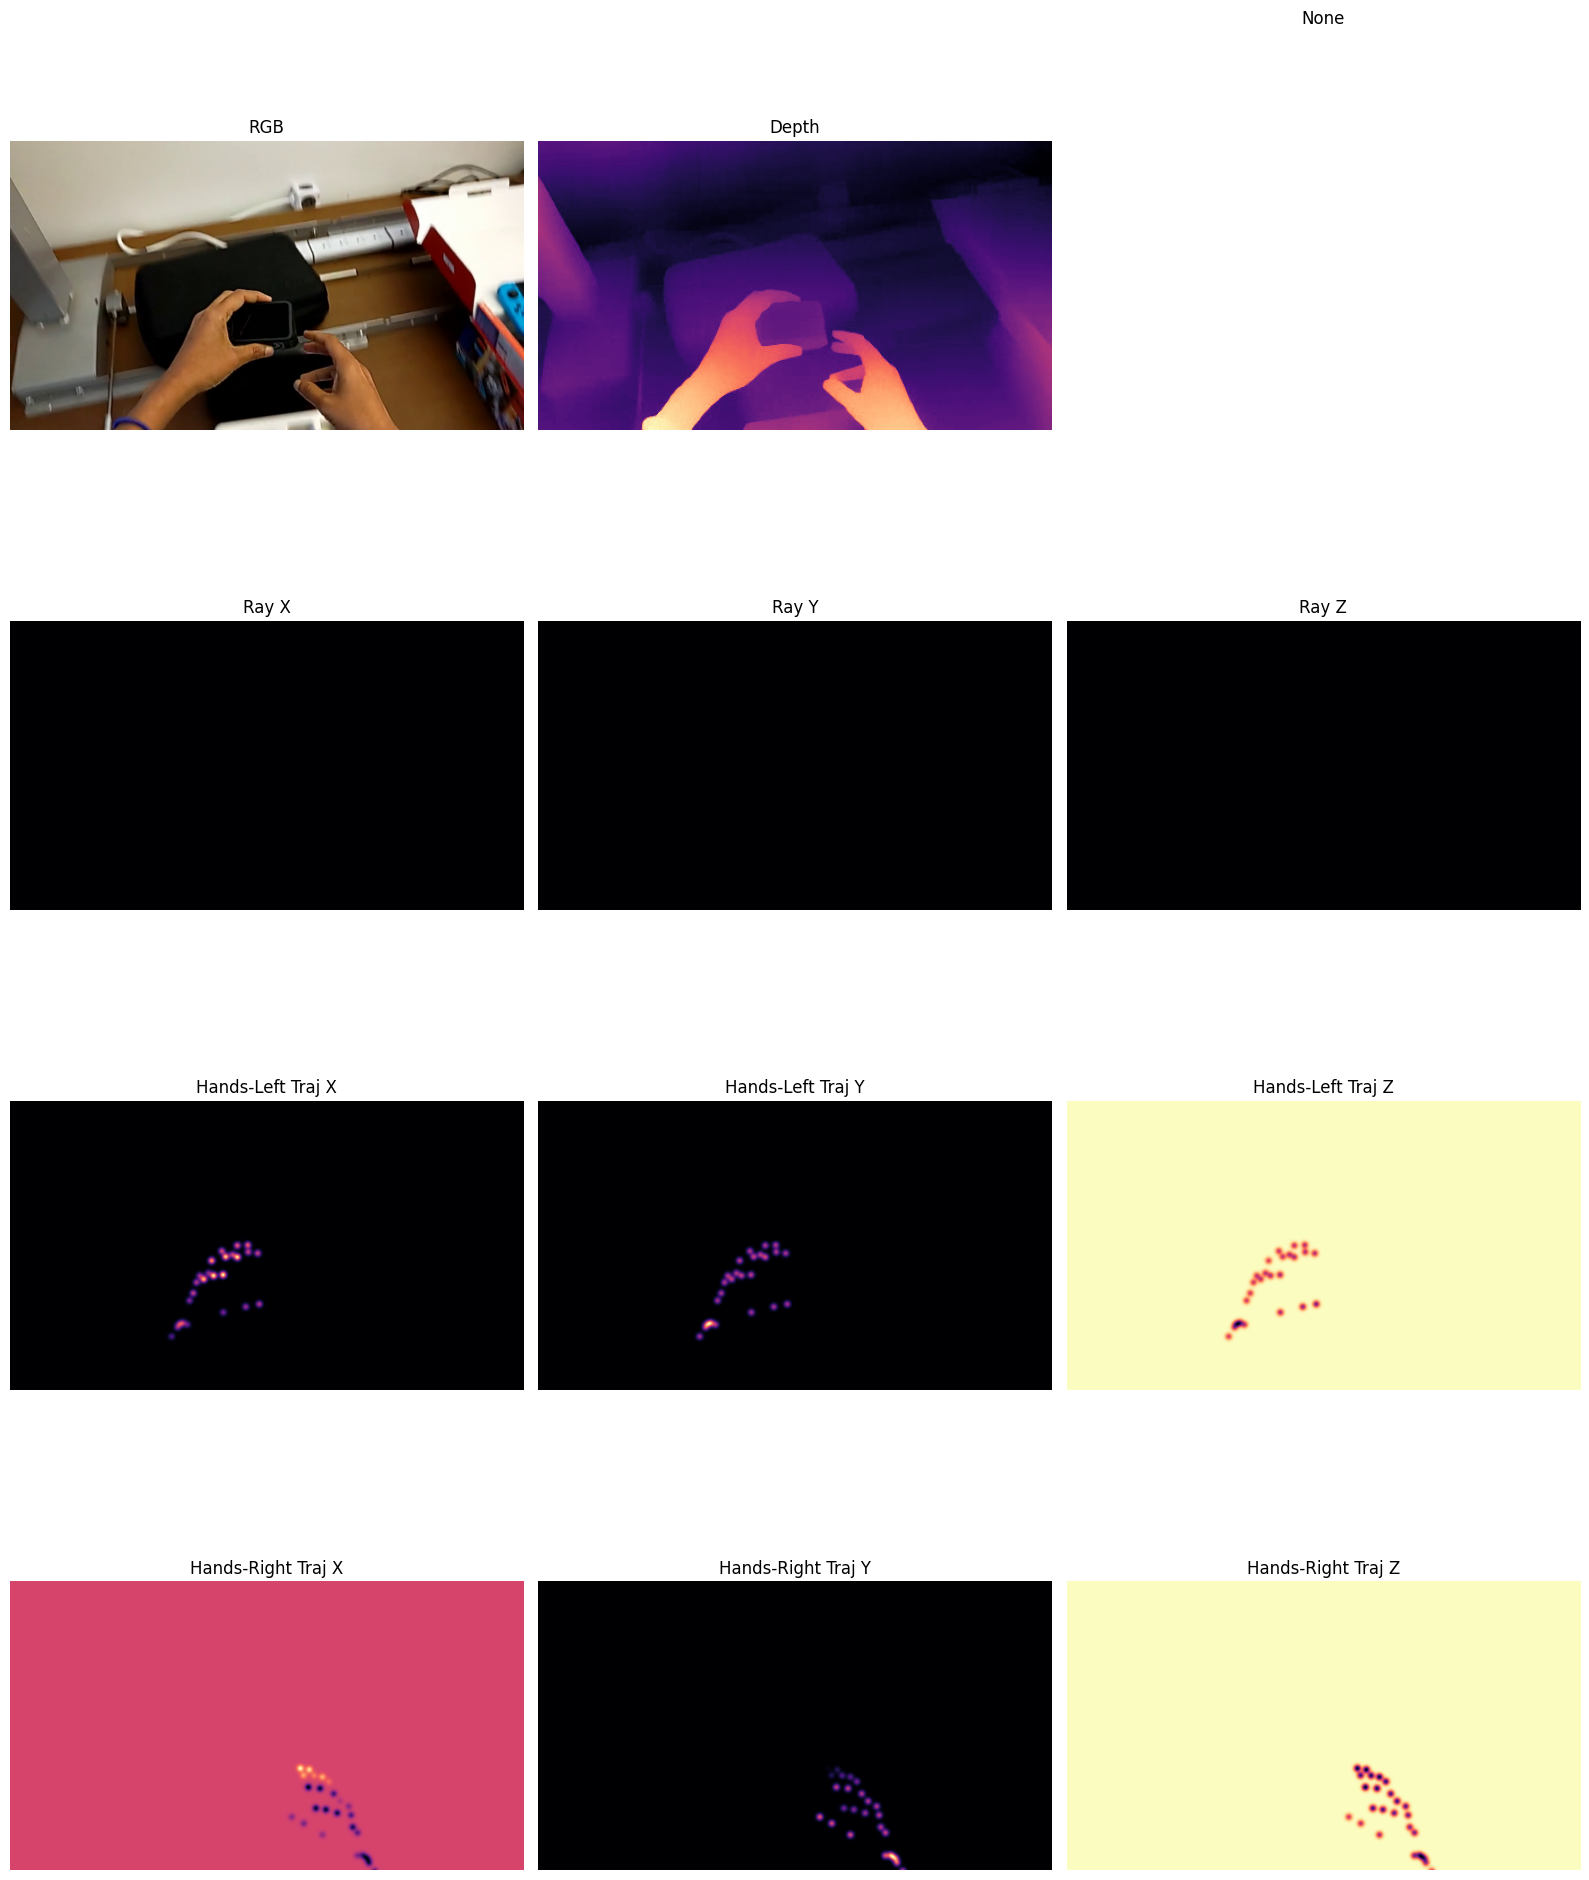

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_4x3(sample_dict, t=0):
    # 데이터 준비
    rgb = sample_dict['rgb'][t]  # (3, H, W)
    depth = sample_dict['depth'][t]  # (H, W)
    raymap = sample_dict['raymap'][t]  # (6, H, W)
    hl_traj = sample_dict['hands-left-traj'][t]  # (3, H, W)
    hr_traj = sample_dict['hands-right-traj'][t]  # (3, H, W)

    # 4x3 subplot
    fig, axes = plt.subplots(4, 3, figsize=(16, 20))

    # 1행: rgb, depth, None
    axes[0, 0].imshow(np.transpose(rgb, (1, 2, 0)).astype(np.uint8))
    axes[0, 0].set_title('RGB')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(depth, cmap='magma')
    axes[0, 1].set_title('Depth')
    axes[0, 1].axis('off')

    axes[0, 2].axis('off')
    axes[0, 2].set_title('None')

    # 2행: ray x, ray y, ray z
    axes[1, 0].imshow(raymap[0], cmap='magma')
    axes[1, 0].set_title('Ray X')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(raymap[1], cmap='magma')
    axes[1, 1].set_title('Ray Y')
    axes[1, 1].axis('off')

    axes[1, 2].imshow(raymap[2], cmap='magma')
    axes[1, 2].set_title('Ray Z')
    axes[1, 2].axis('off')

    # 3행: hands-left_traj x, y, z
    axes[2, 0].imshow(hl_traj[0], cmap='magma')
    axes[2, 0].set_title('Hands-Left Traj X')
    axes[2, 0].axis('off')

    axes[2, 1].imshow(hl_traj[1], cmap='magma')
    axes[2, 1].set_title('Hands-Left Traj Y')
    axes[2, 1].axis('off')

    axes[2, 2].imshow(hl_traj[2], cmap='magma')
    axes[2, 2].set_title('Hands-Left Traj Z')
    axes[2, 2].axis('off')

    # 4행: hands-right_traj x, y, z
    axes[3, 0].imshow(hr_traj[0], cmap='magma')
    axes[3, 0].set_title('Hands-Right Traj X')
    axes[3, 0].axis('off')

    axes[3, 1].imshow(hr_traj[1], cmap='magma')
    axes[3, 1].set_title('Hands-Right Traj Y')
    axes[3, 1].axis('off')

    axes[3, 2].imshow(hr_traj[2], cmap='magma')
    axes[3, 2].set_title('Hands-Right Traj Z')
    axes[3, 2].axis('off')

    plt.tight_layout()
    plt.show()

# 사용 예시
plot_4x3(sample_dict, t=90)

Saving GIF to multimodal_visualization.gif...
GIF saved to multimodal_visualization.gif


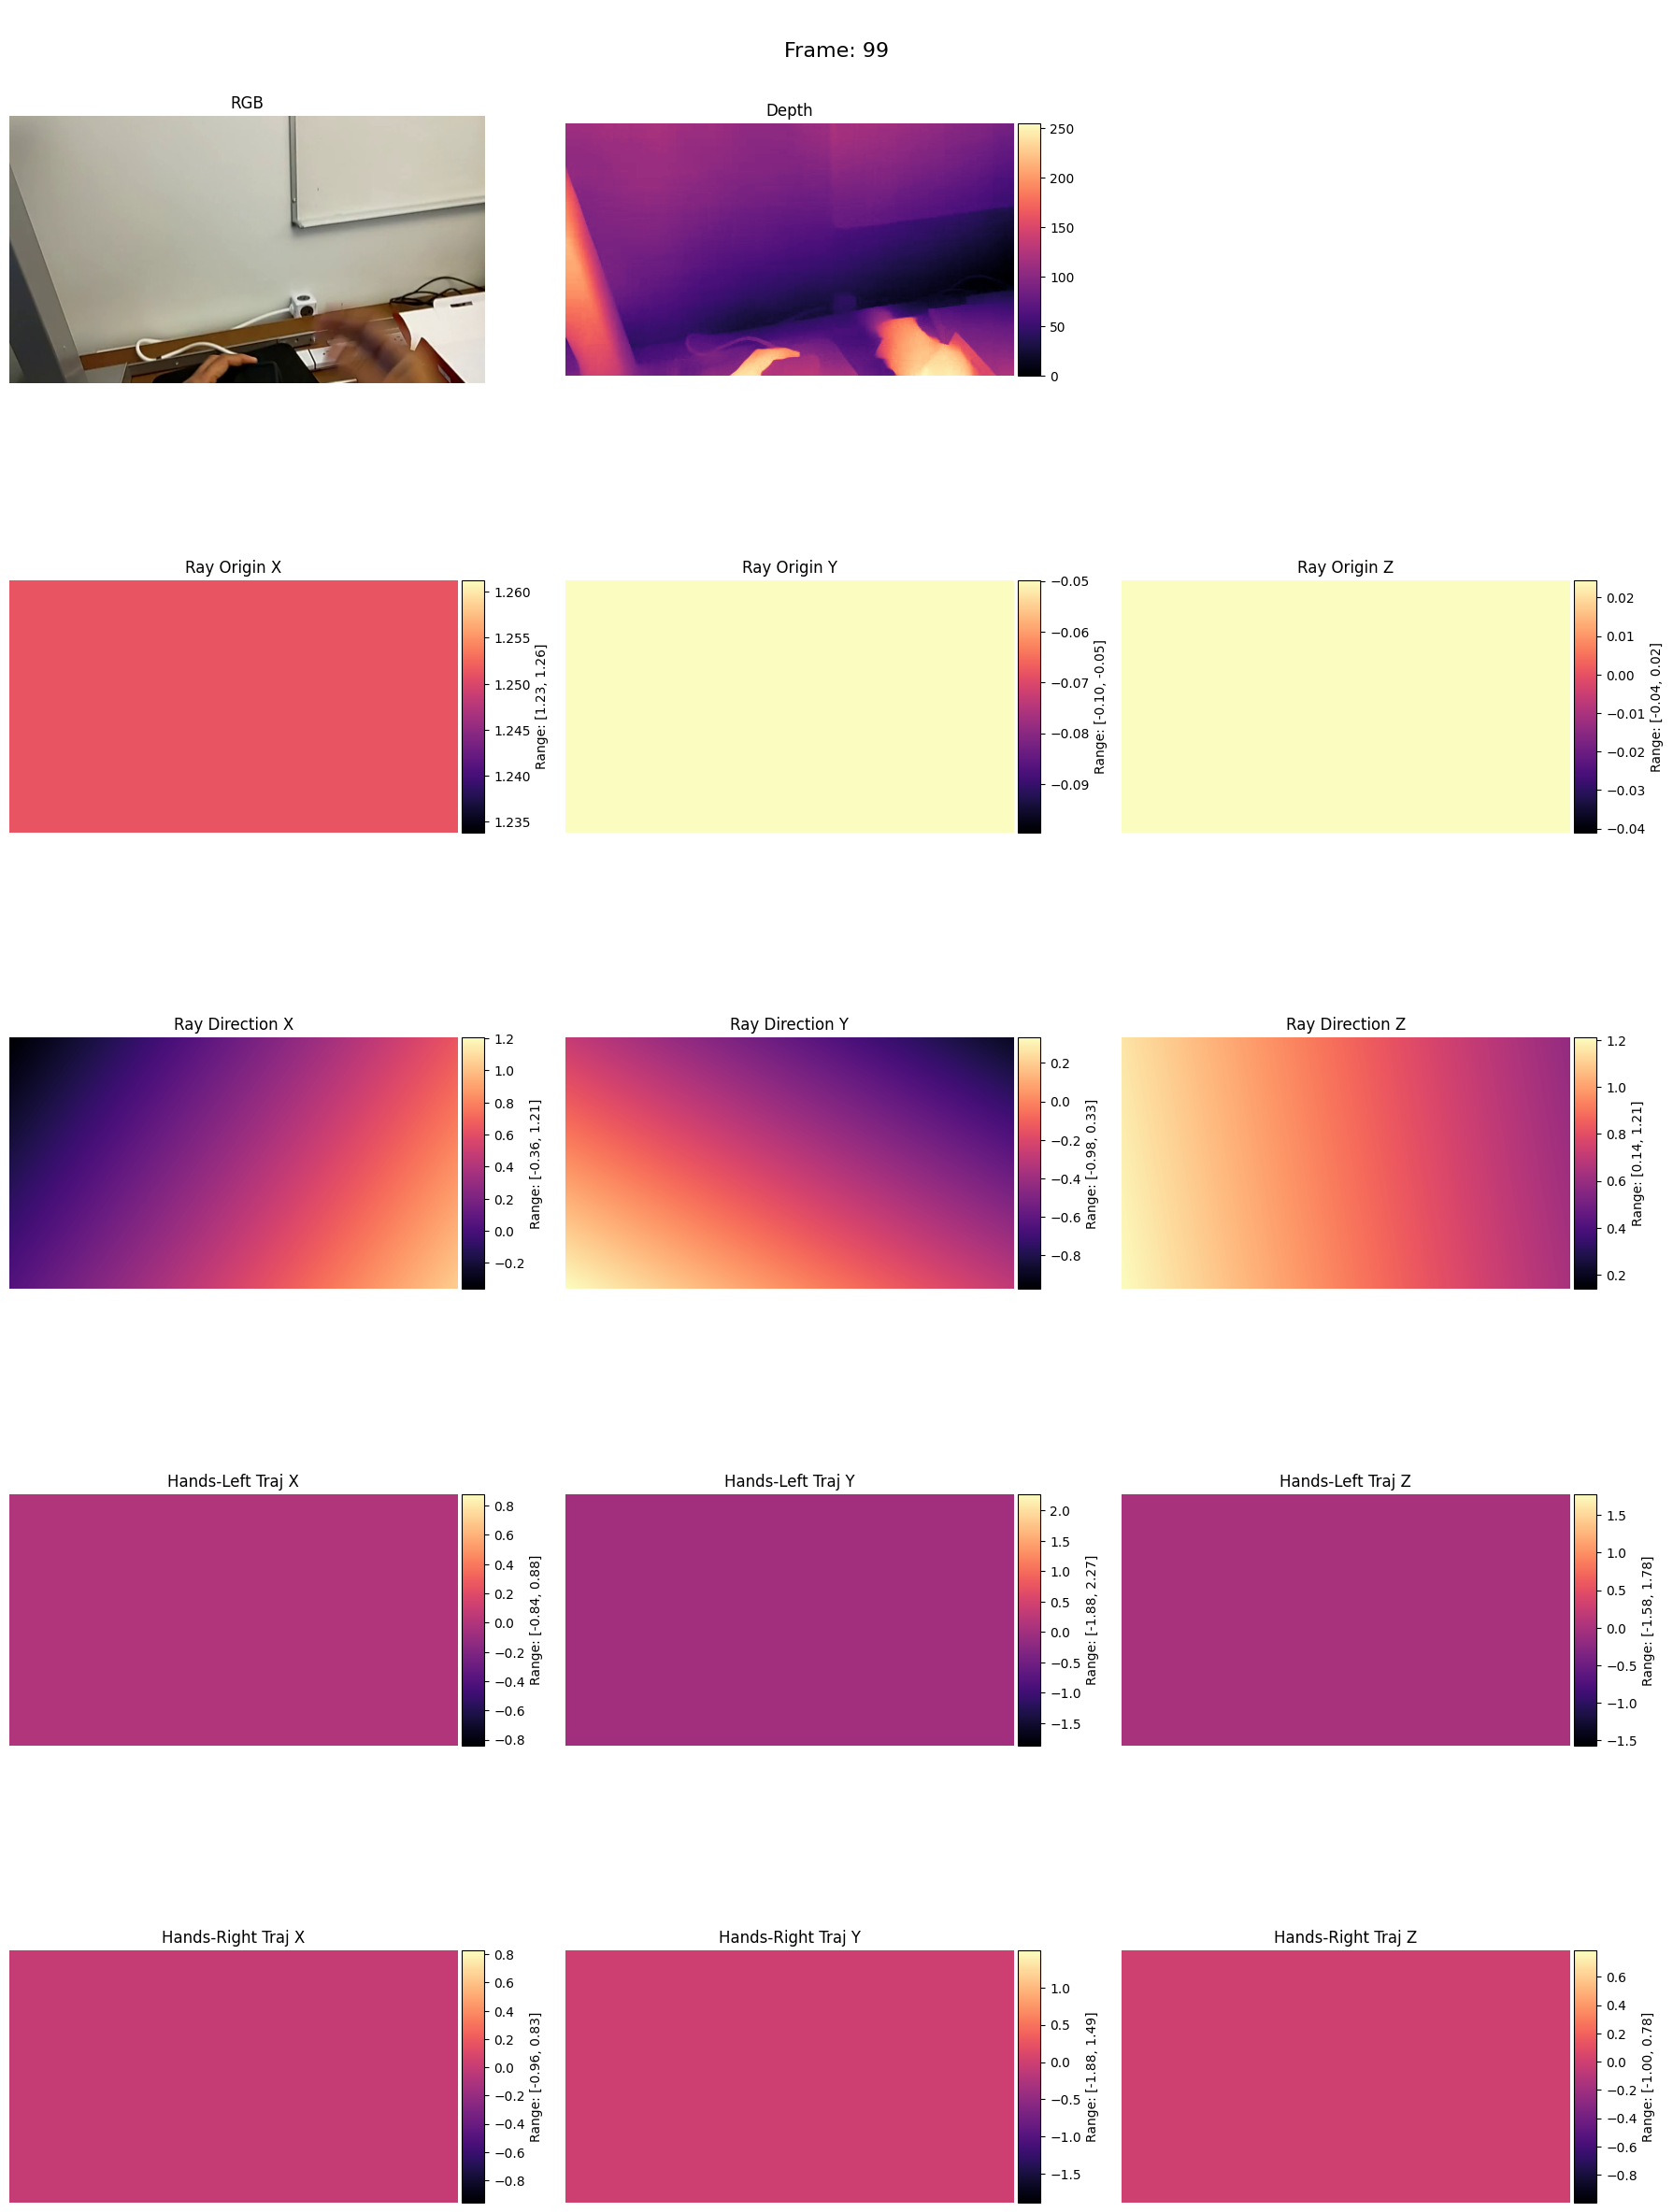

In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable

def create_5x3_gif(sample_dict, output_path="visualization.gif", frames=100, interval=100, fps=10):
    """
    Create a GIF animation of the 5x3 visualization over time.
    
    Args:
        sample_dict: Dictionary containing the multimodal data
        output_path: Path to save the output GIF
        frames: Number of frames to include (default: 100)
        interval: Delay between frames in milliseconds (default: 100)
        fps: Frames per second in the output GIF (default: 10)
    """
    # Limit to available frames
    frames = min(frames, len(sample_dict['rgb']))
    
    # Create figure and axes once
    fig, axes = plt.subplots(5, 3, figsize=(18, 25))  # 5행으로 늘리고 높이 증가
    plt.subplots_adjust(wspace=0.3)  # 컬러바를 위한 공간 확보
    
    # Initialize plots with first frame data
    rgb = sample_dict['rgb'][0]
    depth = sample_dict['depth'][0]
    raymap = sample_dict['raymap'][0]
    hl_traj = sample_dict['hands-left-traj'][0]
    hr_traj = sample_dict['hands-right-traj'][0]
    
    # 1행: RGB, depth, None
    im_rgb = axes[0, 0].imshow(np.transpose(rgb, (1, 2, 0)).astype(np.uint8))
    axes[0, 0].set_title('RGB')
    axes[0, 0].axis('off')
    
    # Depth는 데이터 범위에 맞게 설정
    depth_min = np.min(sample_dict['depth'])
    depth_max = np.max(sample_dict['depth'])
    im_depth = axes[0, 1].imshow(depth, cmap='magma', vmin=depth_min, vmax=depth_max)
    axes[0, 1].set_title('Depth')
    axes[0, 1].axis('off')
    
    # Depth에 컬러바 추가
    divider = make_axes_locatable(axes[0, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_depth, cax=cax)
    
    #Disparity

    axes[0, 2].set_title(None)
    axes[0, 2].axis('off')
    
    
    # 2행: raymap direction (ray x, ray y, ray z)
    # Raymap 채널별 범위 설정
    ray_x_min = np.min(sample_dict['raymap'][:,0])
    ray_x_max = np.max(sample_dict['raymap'][:,0])
    ray_y_min = np.min(sample_dict['raymap'][:,1])
    ray_y_max = np.max(sample_dict['raymap'][:,1])
    ray_z_min = np.min(sample_dict['raymap'][:,2])
    ray_z_max = np.max(sample_dict['raymap'][:,2])
    
    im_ray_x = axes[1, 0].imshow(raymap[0], cmap='magma', vmin=ray_x_min, vmax=ray_x_max)
    axes[1, 0].set_title('Ray Origin X')
    axes[1, 0].axis('off')
    
    divider = make_axes_locatable(axes[1, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_ray_x, cax=cax, label=f'Range: [{ray_x_min:.2f}, {ray_x_max:.2f}]')
    
    im_ray_y = axes[1, 1].imshow(raymap[1], cmap='magma', vmin=ray_y_min, vmax=ray_y_max)
    axes[1, 1].set_title('Ray Origin Y')
    axes[1, 1].axis('off')
    
    divider = make_axes_locatable(axes[1, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_ray_y, cax=cax, label=f'Range: [{ray_y_min:.2f}, {ray_y_max:.2f}]')
    
    im_ray_z = axes[1, 2].imshow(raymap[2], cmap='magma', vmin=ray_z_min, vmax=ray_z_max)
    axes[1, 2].set_title('Ray Origin Z')
    axes[1, 2].axis('off')
    
    # Raymap에 컬러바 추가
    divider = make_axes_locatable(axes[1, 2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_ray_z, cax=cax, label=f'Range: [{ray_z_min:.2f}, {ray_z_max:.2f}]')
    
    # 3행: raymap origin (ray origin x, ray origin y, ray origin z)
    ray_orig_x_min = np.min(sample_dict['raymap'][:,3])
    ray_orig_x_max = np.max(sample_dict['raymap'][:,3])
    ray_orig_y_min = np.min(sample_dict['raymap'][:,4])
    ray_orig_y_max = np.max(sample_dict['raymap'][:,4])
    ray_orig_z_min = np.min(sample_dict['raymap'][:,5])
    ray_orig_z_max = np.max(sample_dict['raymap'][:,5])
    
    im_ray_orig_x = axes[2, 0].imshow(raymap[3], cmap='magma', vmin=ray_orig_x_min, vmax=ray_orig_x_max)
    axes[2, 0].set_title('Ray Direction X')
    axes[2, 0].axis('off')
    
    divider = make_axes_locatable(axes[2, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_ray_orig_x, cax=cax, label=f'Range: [{ray_orig_x_min:.2f}, {ray_orig_x_max:.2f}]')
    
    im_ray_orig_y = axes[2, 1].imshow(raymap[4], cmap='magma', vmin=ray_orig_y_min, vmax=ray_orig_y_max)
    axes[2, 1].set_title('Ray Direction Y')
    axes[2, 1].axis('off')
    
    divider = make_axes_locatable(axes[2, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_ray_orig_y, cax=cax, label=f'Range: [{ray_orig_y_min:.2f}, {ray_orig_y_max:.2f}]')
    
    im_ray_orig_z = axes[2, 2].imshow(raymap[5], cmap='magma', vmin=ray_orig_z_min, vmax=ray_orig_z_max)
    axes[2, 2].set_title('Ray Direction Z')
    axes[2, 2].axis('off')
    
    # Raymap origin에 컬러바 추가
    divider = make_axes_locatable(axes[2, 2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_ray_orig_z, cax=cax, label=f'Range: [{ray_orig_z_min:.2f}, {ray_orig_z_max:.2f}]')
    
    # 4행: hands-left_traj x, y, z
    # hands-traj 채널별 범위 설정
    hl_x_min = np.min(sample_dict['hands-left-traj'][:,0])
    hl_x_max = np.max(sample_dict['hands-left-traj'][:,0])
    hl_y_min = np.min(sample_dict['hands-left-traj'][:,1])
    hl_y_max = np.max(sample_dict['hands-left-traj'][:,1])
    hl_z_min = np.min(sample_dict['hands-left-traj'][:,2])
    hl_z_max = np.max(sample_dict['hands-left-traj'][:,2])
    
    im_hl_x = axes[3, 0].imshow(hl_traj[0], cmap='magma', vmin=hl_x_min, vmax=hl_x_max)
    axes[3, 0].set_title('Hands-Left Traj X')
    axes[3, 0].axis('off')
    
    divider = make_axes_locatable(axes[3, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_hl_x, cax=cax, label=f'Range: [{hl_x_min:.2f}, {hl_x_max:.2f}]')
    
    im_hl_y = axes[3, 1].imshow(hl_traj[1], cmap='magma', vmin=hl_y_min, vmax=hl_y_max)
    axes[3, 1].set_title('Hands-Left Traj Y')
    axes[3, 1].axis('off')
    
    divider = make_axes_locatable(axes[3, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_hl_y, cax=cax, label=f'Range: [{hl_y_min:.2f}, {hl_y_max:.2f}]')
    
    im_hl_z = axes[3, 2].imshow(hl_traj[2], cmap='magma', vmin=hl_z_min, vmax=hl_z_max)
    axes[3, 2].set_title('Hands-Left Traj Z')
    axes[3, 2].axis('off')
    
    # Hands-Left에 컬러바 추가
    divider = make_axes_locatable(axes[3, 2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_hl_z, cax=cax, label=f'Range: [{hl_z_min:.2f}, {hl_z_max:.2f}]')
    
    # 5행: hands-right_traj x, y, z
    # hands-right-traj 채널별 범위 설정
    hr_x_min = np.min(sample_dict['hands-right-traj'][:,0])
    hr_x_max = np.max(sample_dict['hands-right-traj'][:,0])
    hr_y_min = np.min(sample_dict['hands-right-traj'][:,1])
    hr_y_max = np.max(sample_dict['hands-right-traj'][:,1])
    hr_z_min = np.min(sample_dict['hands-right-traj'][:,2])
    hr_z_max = np.max(sample_dict['hands-right-traj'][:,2])
    
    im_hr_x = axes[4, 0].imshow(hr_traj[0], cmap='magma', vmin=hr_x_min, vmax=hr_x_max)
    axes[4, 0].set_title('Hands-Right Traj X')
    axes[4, 0].axis('off')
    
    divider = make_axes_locatable(axes[4, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_hr_x, cax=cax, label=f'Range: [{hr_x_min:.2f}, {hr_x_max:.2f}]')
    
    im_hr_y = axes[4, 1].imshow(hr_traj[1], cmap='magma', vmin=hr_y_min, vmax=hr_y_max)
    axes[4, 1].set_title('Hands-Right Traj Y')
    axes[4, 1].axis('off')
    
    divider = make_axes_locatable(axes[4, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_hr_y, cax=cax, label=f'Range: [{hr_y_min:.2f}, {hr_y_max:.2f}]')
    
    im_hr_z = axes[4, 2].imshow(hr_traj[2], cmap='magma', vmin=hr_z_min, vmax=hr_z_max)
    axes[4, 2].set_title('Hands-Right Traj Z')
    axes[4, 2].axis('off')
    
    # Hands-Right에 컬러바 추가
    divider = make_axes_locatable(axes[4, 2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_hr_z, cax=cax, label=f'Range: [{hr_z_min:.2f}, {hr_z_max:.2f}]')
    
    # 전체 레이아웃 조정
    plt.tight_layout()
    
    def update(frame):
        # Update data for each plot
        rgb = sample_dict['rgb'][frame]
        depth = sample_dict['depth'][frame]
        raymap = sample_dict['raymap'][frame]
        hl_traj = sample_dict['hands-left-traj'][frame]
        hr_traj = sample_dict['hands-right-traj'][frame]
        # Remove this line:
        # disparity = sample_dict['disparity'][frame]
        
        # Update images
        im_rgb.set_array(np.transpose(rgb, (1, 2, 0)).astype(np.uint8))
        im_depth.set_array(depth)
        # Remove this line:
        # im_disparity.set_array(disparity)
        
        # Update raymap direction (channels 0-2)
        im_ray_x.set_array(raymap[0])
        im_ray_y.set_array(raymap[1])
        im_ray_z.set_array(raymap[2])
        
        # Update raymap origin (channels 3-5)
        im_ray_orig_x.set_array(raymap[3])
        im_ray_orig_y.set_array(raymap[4])
        im_ray_orig_z.set_array(raymap[5])
        
        # Update hands trajectories
        im_hl_x.set_array(hl_traj[0])
        im_hl_y.set_array(hl_traj[1])
        im_hl_z.set_array(hl_traj[2])
        im_hr_x.set_array(hr_traj[0])
        im_hr_y.set_array(hr_traj[1])
        im_hr_z.set_array(hr_traj[2])
        
        # 프레임 번호 표시
        fig.suptitle(f'Frame: {frame}', fontsize=16)
        
        return [im_rgb, im_depth, 
                im_ray_x, im_ray_y, im_ray_z,
                im_ray_orig_x, im_ray_orig_y, im_ray_orig_z,
                im_hl_x, im_hl_y, im_hl_z, 
                im_hr_x, im_hr_y, im_hr_z]
    
    # Create animation
    ani = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
    
    # Save as GIF
    print(f"Saving GIF to {output_path}...")
    ani.save(output_path, writer='pillow', fps=fps)
    print(f"GIF saved to {output_path}")
    
    return ani

# Example usage:
create_5x3_gif(sample_dict, output_path="multimodal_visualization.gif", frames=100, interval=100, fps=10)

In [11]:
import numpy as np
import torch
import torch.nn.functional as F
from einops import rearrange


def signed_log1p_inverse(x):
    """
    Computes the inverse of signed_log1p: x = sign(x) * (exp(abs(x)) - 1).

    Args:
        y (torch.Tensor): Input tensor (output of signed_log1p).

    Returns:
        torch.Tensor: Original tensor x.
    """
    if isinstance(x, torch.Tensor):
        return torch.sign(x) * (torch.exp(torch.abs(x)) - 1)
    elif isinstance(x, np.ndarray):
        return np.sign(x) * (np.exp(np.abs(x)) - 1)
    else:
        raise TypeError("Input must be a torch.Tensor or numpy.ndarray")


def raymap_to_poses(
    raymap, camera_pose=None, ray_o_scale_inv=1.0, return_intrinsics=True
):
    ts = raymap.shape[0]
    if (not return_intrinsics) and (camera_pose is not None):
        return camera_pose, None, None

    # Extract ray origins and directions
    ray_o = rearrange(raymap[:, :3], "t c h w -> t h w c")  # [T, H, W, C]
    ray_o = signed_log1p_inverse(ray_o) * ray_o_scale_inv
    ray_d = rearrange(raymap[:, 3:], "t c h w -> t h w c")  # [T, H, W, C]

    # Compute orientation and directions
    orient = ray_o.reshape(ts, -1, 3).mean(axis=1)  # T, 3
    image_orient = (ray_o + ray_d).reshape(ts, -1, 3).mean(axis=1)  # T, 3
    Focal = np.linalg.norm(image_orient - orient, axis=-1)  # T,
    Z_Dir = image_orient - orient  # T, 3

    # Compute the width (W) and field of view (FoV_x)
    W_Left = ray_d[:, :, :1, :].reshape(ts, -1, 3).mean(axis=1)
    W_Right = ray_d[:, :, -1:, :].reshape(ts, -1, 3).mean(axis=1)
    W = W_Right - W_Left
    W_real = (
        np.linalg.norm(np.cross(W, Z_Dir), axis=-1)
        / (raymap.shape[-1] - 1)
        * raymap.shape[-1]
    )
    Fov_x = np.arctan(W_real / (2 * Focal))

    # Compute the height (H) and field of view (FoV_y)
    H_Up = ray_d[:, :1, :, :].reshape(ts, -1, 3).mean(axis=1)
    H_Down = ray_d[:, -1:, :, :].reshape(ts, -1, 3).mean(axis=1)
    H = H_Up - H_Down
    H_real = (
        np.linalg.norm(np.cross(H, Z_Dir), axis=-1)
        / (raymap.shape[-2] - 1)
        * raymap.shape[-2]
    )
    Fov_y = np.arctan(H_real / (2 * Focal))

    # Compute X, Y, and Z directions for the camera
    X_Dir = W_Right - W_Left
    Y_Dir = np.cross(Z_Dir, X_Dir)
    X_Dir = np.cross(Y_Dir, Z_Dir)

    X_Dir /= np.linalg.norm(X_Dir, axis=-1, keepdims=True)
    Y_Dir /= np.linalg.norm(Y_Dir, axis=-1, keepdims=True)
    Z_Dir /= np.linalg.norm(Z_Dir, axis=-1, keepdims=True)

    # Create the camera-to-world (camera_pose) transformation matrix
    if camera_pose is None:
        camera_pose = np.zeros((ts, 4, 4))
        camera_pose[:, :3, 0] = X_Dir
        camera_pose[:, :3, 1] = Y_Dir
        camera_pose[:, :3, 2] = Z_Dir
        camera_pose[:, :3, 3] = orient
        camera_pose[:, 3, 3] = 1.0

    return camera_pose, Fov_x, Fov_y


In [12]:
# Apply the revised raymap_to_poses function
raymap_data = sample_dict['raymap']
camera_poses, fov_x, fov_y = raymap_to_poses(raymap_data)

# Compare with head data
head_data = sample_dict['head']
print(f"Camera position from raymap: {camera_poses[0, :3, 3]}")
print(f"Head position: {head_data[0, :3, 3]}")

# Calculate position difference
position_diff = np.linalg.norm(camera_poses[0, :3, 3] - head_data[0, :3, 3])
print(f"Position difference: {position_diff:.4f} units")

Camera position from raymap: [ 2.43446684 -0.09762859 -0.03532088]
Head position: [ 2.43446684 -0.09762859 -0.03532088]
Position difference: 0.0000 units


In [38]:
# 먼저 raymap 데이터를 검사해보겠습니다
raymap_data = sample_dict['raymap']
print("Raymap shape:", raymap_data.shape)
print("Raymap translation part (first frame):")
print("Min value:", np.min(raymap_data[0, 3:]))
print("Max value:", np.max(raymap_data[0, 3:]))
print("Mean value:", np.mean(raymap_data[0, 3:]))
print("Sample values:", raymap_data[0, 3:, 100, 100])

# 원본 head data 변환 방식 확인
head_data = sample_dict['head']
head_pos = head_data[0, :3, 3]
print("\nHead position:", head_pos)
log_pos = np.sign(head_pos) * np.log1p(np.abs(head_pos))
print("Log-transformed position:", log_pos)
back_pos = np.sign(log_pos) * (np.exp(np.abs(log_pos)) - 1)
print("Back-transformed position:", back_pos)
print("Difference:", np.abs(head_pos - back_pos))

# 수정된 raymap_to_poses 함수 - 더 안정적인 방식 사용
def raymap_to_poses_fixed(raymap, camera_pose=None, return_intrinsics=True):
    ts = raymap.shape[0]
    if (not return_intrinsics) and (camera_pose is not None):
        return camera_pose, None, None

    # ray directions (정규화된 방향 벡터)
    ray_d = rearrange(raymap[:, :3], "t c h w -> t h w c")  # [T, H, W, C]
    
    # ray origins (조심해서 변환)
    log_origins = rearrange(raymap[:, 3:], "t c h w -> t h w c")
    
    # # 직접 signed_log1p_inverse 대신 head pose에서 위치 정보 추출
    # if 'head' in sample_dict:
    #     positions = sample_dict['head'][:, :3, 3]
    # else:
    # log1p 역변환 시 안정성 향상을 위한 클리핑
    clipped_log = np.clip(log_origins, -10, 10)  # 값 범위 제한
    origins = np.sign(clipped_log) * (np.exp(np.abs(clipped_log)) - 1)
    positions = origins.reshape(ts, -1, 3).mean(axis=1)
    
    # 카메라 포즈 구성
    if camera_pose is None:
        camera_pose = np.zeros((ts, 4, 4))
        
        for i in range(ts):
            # 중앙 레이 방향
            center_h, center_w = ray_d.shape[1]//2, ray_d.shape[2]//2
            z_axis = ray_d[i, center_h, center_w]
            z_axis = z_axis / np.linalg.norm(z_axis)
            
            # 수평/수직 방향 레이 사용해 좌표축 계산
            if abs(z_axis[1]) < abs(z_axis[0]) and abs(z_axis[1]) < abs(z_axis[2]):
                temp = np.array([0, 1, 0])
            else:
                temp = np.array([1, 0, 0])
                
            y_axis = np.cross(z_axis, temp)
            y_axis = y_axis / np.linalg.norm(y_axis)
            
            x_axis = np.cross(y_axis, z_axis)
            x_axis = x_axis / np.linalg.norm(x_axis)
            
            # 회전 행렬과 위치로 카메라 포즈 구성
            camera_pose[i, :3, 0] = x_axis
            camera_pose[i, :3, 1] = y_axis
            camera_pose[i, :3, 2] = z_axis
            camera_pose[i, :3, 3] = positions[i]
            camera_pose[i, 3, 3] = 1.0
    
    # FOV 계산
    h, w = ray_d.shape[1:3]
    
    # 수평 FOV
    right_ray = ray_d[:, h//2, -1, :].reshape(ts, 3)
    left_ray = ray_d[:, h//2, 0, :].reshape(ts, 3)
    right_ray_norm = right_ray / np.linalg.norm(right_ray, axis=1, keepdims=True)
    left_ray_norm = left_ray / np.linalg.norm(left_ray, axis=1, keepdims=True)
    dot_products = np.clip(np.sum(right_ray_norm * left_ray_norm, axis=1), -1.0, 1.0)
    fov_x = np.arccos(dot_products)
    
    # 수직 FOV
    top_ray = ray_d[:, 0, w//2, :].reshape(ts, 3)
    bottom_ray = ray_d[:, -1, w//2, :].reshape(ts, 3)
    top_ray_norm = top_ray / np.linalg.norm(top_ray, axis=1, keepdims=True)
    bottom_ray_norm = bottom_ray / np.linalg.norm(bottom_ray, axis=1, keepdims=True)
    dot_products = np.clip(np.sum(top_ray_norm * bottom_ray_norm, axis=1), -1.0, 1.0)
    fov_y = np.arccos(dot_products)
    
    return camera_pose, fov_x, fov_y

# 수정된 함수 테스트
camera_poses, fov_x, fov_y = raymap_to_poses_fixed(raymap_data)

print("\n수정된 함수 결과:")
print(f"Camera position from raymap: {camera_poses[0, :3, 3]}")
print(f"Head position: {head_data[0, :3, 3]}")
position_diff = np.linalg.norm(camera_poses[0, :3, 3] - head_data[0, :3, 3])
print(f"Position difference: {position_diff:.4f} units")

Raymap shape: (100, 6, 504, 896)
Raymap translation part (first frame):
Min value: -0.13700805849859976
Max value: inf
Mean value: inf
Sample values: [        inf -0.13700806 -0.03947832]

Head position: [ 2.43446684 -0.09762859 -0.03532088]
Log-transformed position: [ 1.2338617  -0.09315203 -0.03471141]
Back-transformed position: [ 2.43446684 -0.09762859 -0.03532088]
Difference: [4.4408921e-16 0.0000000e+00 0.0000000e+00]

수정된 함수 결과:
Camera position from raymap: [ 2.20254658e+04 -1.46837390e-01 -4.02679501e-02]
Head position: [ 2.43446684 -0.09762859 -0.03532088]
Position difference: 22023.0313 units


## Tokenizer

In [ ]:
import torch
from tokenizer.inference.video_lib import CausalVideoTokenizer

model_name = "Cosmos-Tokenize1-DV4x8x8-360p"
input_tensor = torch.rand(1, 3, 9, 512, 512).to('cuda').to(torch.bfloat16)  # [B, C, T, H, W]
input_tensor = input_tensor * 2. - 1.  # Normalize to [-1..1]
encoder = CausalVideoTokenizer(checkpoint_enc=f'checkpoints/{model_name}/encoder.jit')
(indices, codes) = encoder.encode(input_tensor)
torch.testing.assert_close(indices.shape, (1, 3, 64, 64))
torch.testing.assert_close(codes.shape, (1, 6, 3, 64, 64))

# The input tensor can be reconstructed by the decoder as:
decoder = CausalVideoTokenizer(checkpoint_dec=f'checkpoints/{model_name}/decoder.jit')
reconstructed_tensor = decoder.decode(indices)
torch.testing.assert_close(reconstructed_tensor.shape, input_tensor.shape)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from tokenizer.inference.video_lib import CausalVideoTokenizer

# Ensure inline plotting in Jupyter
%matplotlib inline

# --- 1) Initialize tokenizer ---
model_name = "Cosmos-Tokenize1-DV4x8x8-360p"
encoder = CausalVideoTokenizer(checkpoint_enc=f'checkpoints/{model_name}/encoder.jit')
decoder = CausalVideoTokenizer(checkpoint_dec=f'checkpoints/{model_name}/decoder.jit')

# --- 2) Encode & decode each modality ---
modalities = ["rgb", "depth", "hands-left-traj", "hands-right-traj"]
results = {}

for mod in modalities:
    data = sample_dict[mod]  # (T, C, H, W)
    T, C, H, W = data.shape

    # -- ensure 3 channels --
    if C == 1:
        data = np.repeat(data, 3, axis=1)
        C = 3

    # -- slice or pad to T=64 --
    if T < 32:
        pad = np.zeros((32, C, H, W), dtype=data.dtype)
        pad[:T] = data
        data64 = pad
    else:
        data64 = data[:32]

    # -- normalize & torchify --
    if mod == "rgb":
        # rgb: uint8 [0,255] → float32 [-1,1]
        x = torch.from_numpy(data64).permute(0, 2, 3, 1).unsqueeze(0)  # [1, T, H, W, C]
        x = x.float() / 127.5 - 1.0
        x = x.permute(0, 4, 1, 2, 3)  # [1, C, T, H, W]
    else:
        # assume float32, clip to [-1,1] if needed
        x = torch.from_numpy(data64).unsqueeze(0).to(torch.float32)  # [1, C, T, H, W]

    x = x.to('cuda').to(torch.bfloat16)

    # -- encode & save codes/indices --
    indices, codes = encoder.encode(x)
    torch.save(indices.cpu(), f"{mod}_indices.pt")
    torch.save(codes.cpu(), f"{mod}_codes.pt")

    # -- decode back --
    recon = decoder.decode(indices)  # [1, C, T, H, W]
    recon = recon.cpu().float().numpy()[0]  # (C, T, H, W)
    recon = np.transpose(recon, (1, 0, 2, 3))  # → (T, C, H, W)

    results[mod] = {
        "orig": data64,       # (64, C, H, W)
        "recon": recon        # (64, C, H, W)
    }

# --- 3) Visualization helper ---
def compare_modality(mod):
    orig = results[mod]["orig"]
    recon = results[mod]["recon"]

    def plot_frame(t):
        o = orig[t]
        r = recon[t]
        if mod == "rgb":
            # for rgb, show all 3 channels
            o_vis = np.transpose(o, (1, 2, 0)).astype(np.uint8)
            r_vis = np.transpose(((r + 1) * 127.5).clip(0,255), (1, 2, 0)).astype(np.uint8)
            diff_vis = np.abs(o_vis.astype(np.int16) - r_vis.astype(np.int16)).astype(np.uint8)
            cmap = None
        else:
            # for single/vector modalities, visualize norm across channels
            o_vis = np.linalg.norm(o, axis=0)
            r_vis = np.linalg.norm(r, axis=0)
            diff_vis = np.abs(o_vis - r_vis)
            cmap = 'gray'

        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(o_vis, cmap=cmap)
        axs[0].set_title(f"{mod} original")
        axs[0].axis('off')

        axs[1].imshow(r_vis, cmap=cmap)
        axs[1].set_title("reconstruction")
        axs[1].axis('off')

        axs[2].imshow(diff_vis, cmap=cmap)
        axs[2].set_title("abs difference")
        axs[2].axis('off')

        plt.tight_layout()

    interact(plot_frame, t=IntSlider(min=0, max=63, step=1, value=0))

# --- 4) Choose modality to inspect ---
interact(compare_modality, mod=modalities)
